# `pyddsde` with vector data

(This notebook assumes that you have gone through the [Getting Started](./1%20-%20Getting%20Started.ipynb) notebook.)

`pyddsde` also works with (2-dimensional) vector data. For a 2-D timeseries $(x(t), y(t))$, `pyddsde` attempts to fit the following model:

$$
\frac{dx}{dt} = A_1(x, y) + B_{11}(x, y) \cdot \eta_1(t) + B_{12}(x, y) \cdot \eta_2(t) \\
\frac{dy}{dt} = A_2(x, y) + B_{21}(x, y) \cdot \eta_1(t) + B_{12}(x, y) \cdot \eta_2(t)
$$

where $B_{12} = B_{21}$. Here, $A_1$ and $A_2$ are the drift functions, $B_{11}$ and $B_{22}$ are the diffusion functions, and $B_{12} = B_{21}$ is the cross-diffusion term. As with the scalar case, `pyddsde` recovers $B^2_{11}, B^2_{22}$ and $B^2_{12}$.

In [1]:
# %load_ext autoreload
# %autoreload 2

# import sys
# sys.path.append('..')

import pyddsde

ZMQInteractiveShell


## Initializing the `pyddsde` object

Similar to the scalar analysis, we need to initialize a `pyddsde` object. In this case, `data` will be a two element list.

Note: All summary and plots are rounded to third decimal place.
Calculations, however, are accurate and account for missing values too.


| Mx range                       :   (-1.0, 1.0)  |
| Mx mean                        :     -0.007     |
| My range                       :   (-1.0, 1.0)  |
| My mean                        :     -0.005     |
| |M| range                      :  (0.001, 1.0)  |
| |M| mean                       :      0.747     |
| Autocorr time (Mx, My, |M^2|)  :  (61, 63, 14)  |
| (Dt, dt)                       :     (1, 1)     |



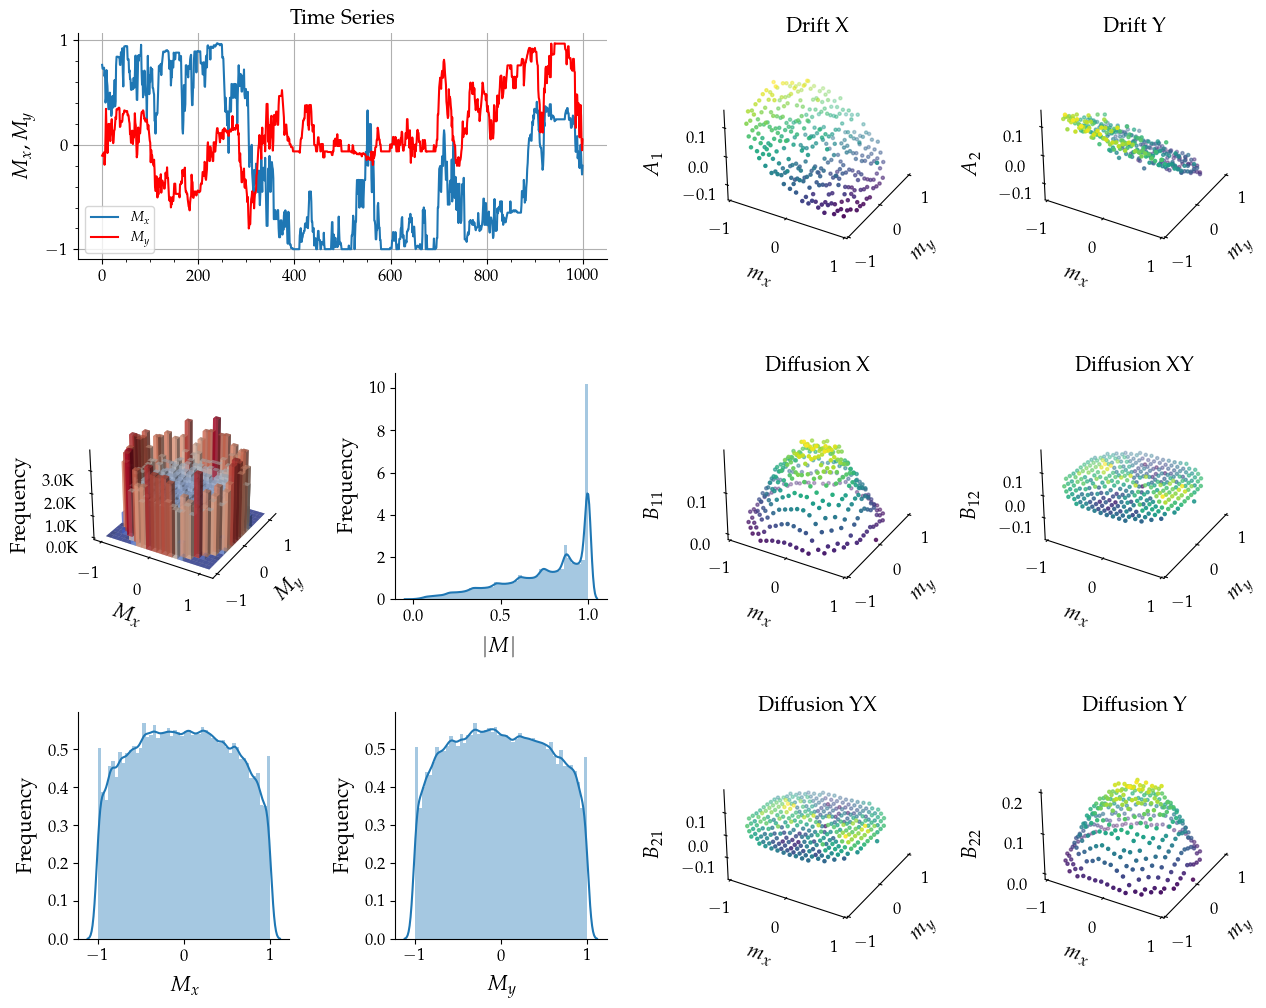

In [2]:
data, t = pyddsde.load_sample_dataset('model-data-vector-pairwise')
ddsde = pyddsde.Characterize(data, t, bins=20)

## Recovering functional forms for drift and diffusion

There are 5 different functions, each of two variables: two drift functions ($A_1$ and $A_2$), two diffusion functions ($B^2_{11}$ and $B^2_{22}$) and a cross diffusion term ($B^2_{12} = B^2_{21}$). As with the 1D example, these can be fit by calling the `ddsde.fit()` function.

In [3]:
A1 = ddsde.fit('A1', order=3, tune=True)
print(A1)

(-0.127 ± 0.006)x


In [4]:
A2 = ddsde.fit('A2', order=3, tune=True)
print(A2)

(-0.126 ± 0.006)y


In [5]:
B11 = ddsde.fit('B11', order=3, tune=True)
print(B11)

(0.182 ± 0.000) + (-0.168 ± 0.001)x^2 + (-0.172 ± 0.001)y^2


In [6]:
B22 = ddsde.fit('B22', order=3, tune=True)
print(B22)

(0.183 ± 0.000) + (-0.174 ± 0.001)x^2 + (-0.170 ± 0.001)y^2


In [7]:
B21 = ddsde.fit('B21', order=3, tune=True)
print(B21)

(0.010 ± 0.001)x^2 + (-0.010 ± 0.001)y^2


The coefficients in $B_{21}$ are negligible, i.e. $B_{21}$ is effectively 0.
We can force `pyddsde` to ignore small coefficients by setting an appropriate sparity threshold manually instead of letting it automatically choose a threshold (see **FITTING NOTEBOOK** for further details).

In [12]:
B21 = ddsde.fit('B21', order=3, threshold=0.1)
print(B21)

0


## Interactive plots for drift and diffusion

As with the 1D example, we can get interactive plots of drift and diffusion functions using `ddsde.drift()` and `ddsde.diffusion()`. For 2D, there is also the `ddsde.cross_diffusion()` function to get the cross-diffusion plot.

In [15]:
ddsde.drift()

In [16]:
ddsde.diffusion()

In [17]:
ddsde.cross_diffusion()